## Portfolio assignment 17
30 min: Train a decision tree to predict the body_mass_g of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [12]:
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

penguins = sns.load_dataset("penguins")

In [21]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [7]:
penguins = penguins.fillna(penguins['body_mass_g'].mean())

penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42)

In [19]:
features = ['flipper_length_mm'] 
dt_regression = DecisionTreeRegressor(max_depth = 10) # Increase max_depth to see effect in the plot
dt_regression.fit(penguins_train[features], penguins_train['body_mass_g'])

DecisionTreeRegressor(max_depth=10)

In [20]:
# De RMSE op de training set is hoger, omdat het model getrained is op die set. Dit zorgt voor minder errors in die set.

predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 328.05066292540704
RMSE on test set 440.52071734553186


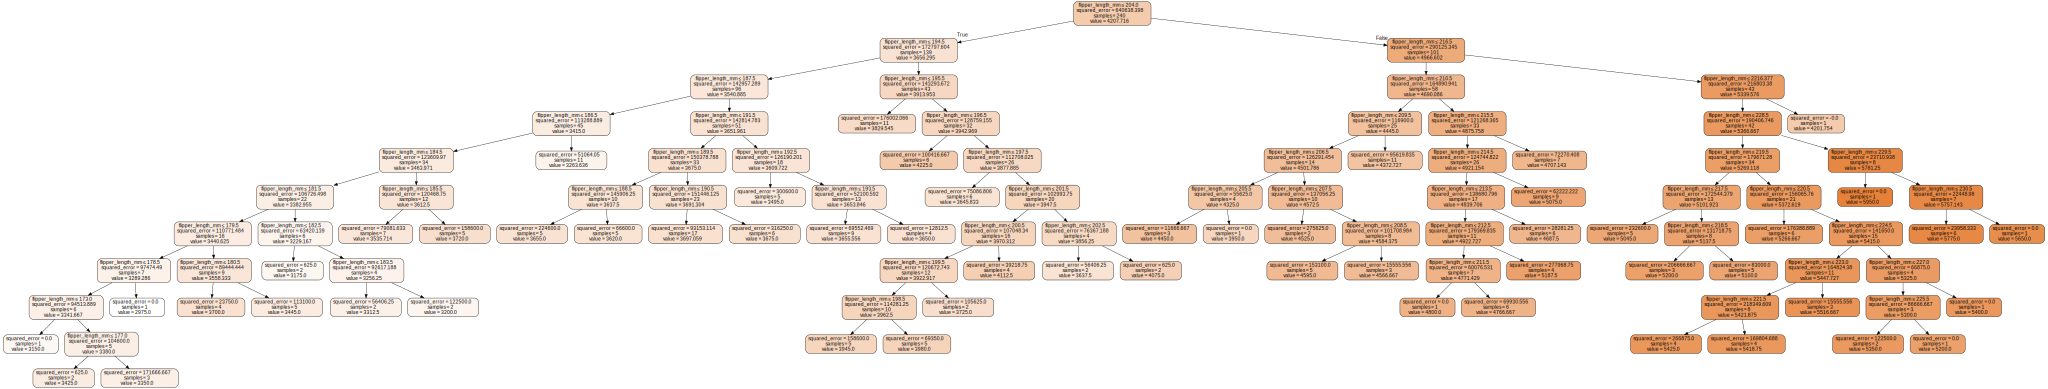

In [22]:
plot_tree_regression(dt_regression, features)